Задание

Цель: применить на практике методы по оценке качества данных.
Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

Получите и загрузите данные.

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Удалите все пропущенные значения и категориальные переменные.
Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
df_train.drop(columns = ['PassengerId'], inplace = True)
df_train = df_train.select_dtypes(exclude=['object']).dropna()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [ ]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
Y = df_train['Survived']
X = df_train.drop(columns = ['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.6953907815631263

In [ ]:
model.score(X_test, y_test)

0.7069767441860465

In [ ]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

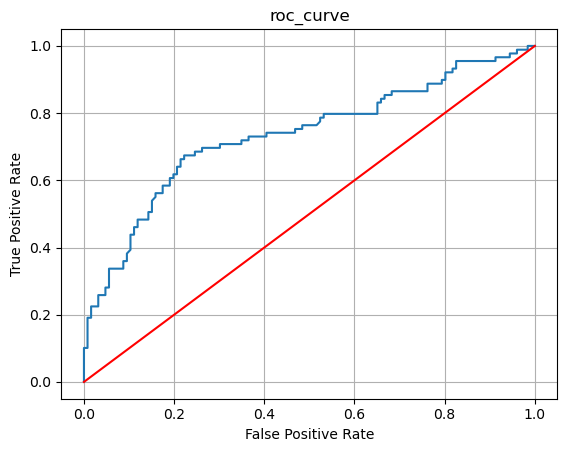

In [ ]:
plt.plot(fpr, tpr)
plt.title('roc_curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1],[0, 1], color='red')
plt.grid()

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.7351970750847157

Снова загрузите полные данные.

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.drop(columns = ['PassengerId'], inplace = True)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [ ]:
# Name  - убираем сразу логически никак не притянешь
# 'Ticket' - возможно в шаблоне имени билета зашита категория пассажира, но у нас есть Pclass
# Fare - коррелирует с категорией Pclass
# Cabin - возможно категоризировать по камфортности, но у нас есть Pclass, плюс много пропусков
# 'Embarked' - не очевидно, требует доп. изысканий,  пока пожертвуем
X = df_train.drop(columns = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

X.isna().mean()*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
dtype: float64

b) Заполните пропуски: средним значением;
    константой; классом, указывающим на то, что значение было пропущено; случайным числом.
    Для разных признаков используйте подходящий метод.
    Можно не использовать все перечисленные методы.

In [ ]:
# пропуски в Age  19%, замена на среднее
X['Age'].fillna(X['Age'].mean(), inplace = True)

In [ ]:
X.isna().mean()*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
dtype: float64

Категориальные переменные переведите в цифровые значения.
Можно использовать pd.get_dummies, preprocessing.LabelEncoder.
Старайтесь не использовать для этой задачи циклы.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [ ]:

X = pd.get_dummies(X, columns=['Pclass', 'Sex'])
# Sex_female - избыточная категория
X = X.drop(columns=['Sex_female'])
X.columns




Index(['Survived', 'Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_male'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Pclass_1  891 non-null    uint8  
 5   Pclass_2  891 non-null    uint8  
 6   Pclass_3  891 non-null    uint8  
 7   Sex_male  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 31.4 KB


In [ ]:
X.head(10)

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,0,0,1,1
1,1,38.000000,1,0,1,0,0,0
2,1,26.000000,0,0,0,0,1,0
3,1,35.000000,1,0,1,0,0,0
4,0,35.000000,0,0,0,0,1,1
5,0,29.699118,0,0,0,0,1,1
6,0,54.000000,0,0,1,0,0,1
7,0,2.000000,3,1,0,0,1,1
8,1,27.000000,0,2,0,0,1,0
9,1,14.000000,1,0,0,1,0,0


Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [ ]:
# межквартальный диапазон
q1 = X['Age'].quantile(0.25)
q3 = X['Age'].quantile(0.75)
iqr = X['Age'].quantile(0.75) - X['Age'].quantile(0.25)
lower_bound = X['Age'].quantile(0.25) - (1.5 * iqr)
upper_bound = X['Age'].quantile(0.75) + (1.5 * iqr)
remove_outliers = X.query(f'`Age` < {lower_bound} or `Age` > {upper_bound}')
remove_outliers.count()



Survived    66
Age         66
SibSp       66
Parch       66
Pclass_1    66
Pclass_2    66
Pclass_3    66
Sex_male    66
dtype: int64

In [ ]:
#выбросов 7%, принимаем решение удалить
X = X.loc[((upper_bound >= X['Age']) & (X['Age'] >= lower_bound))]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Age       825 non-null    float64
 2   SibSp     825 non-null    int64  
 3   Parch     825 non-null    int64  
 4   Pclass_1  825 non-null    uint8  
 5   Pclass_2  825 non-null    uint8  
 6   Pclass_3  825 non-null    uint8  
 7   Sex_male  825 non-null    uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 35.4 KB


*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной
(из графика можно сделать вывод об особенностях датасета/класса/признака)

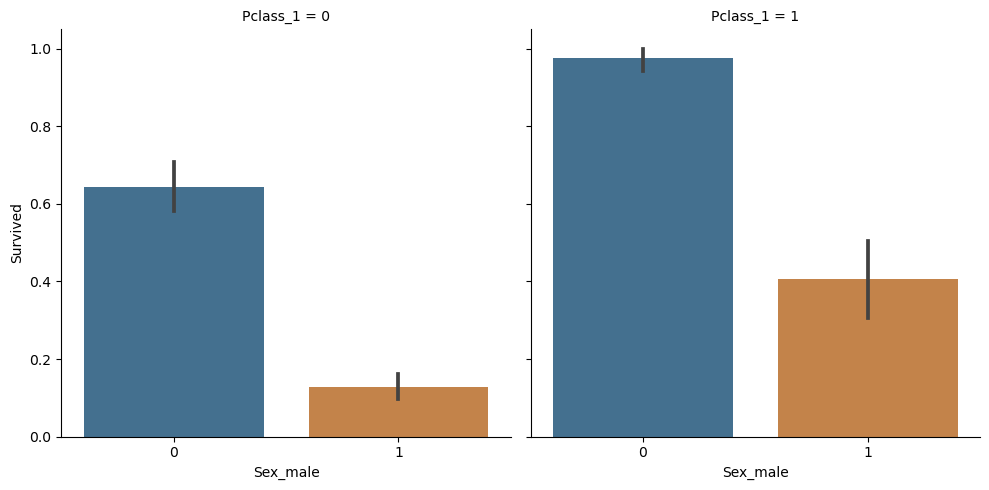

In [ ]:
# график признака Survived' для Pclass_1 и Pclass_2+Pclass_3, с разбивкой по Sex
sns.catplot(data = X,y='Survived',x='Sex_male',col='Pclass_1', kind='bar', saturation=0.5)

<Axes: >

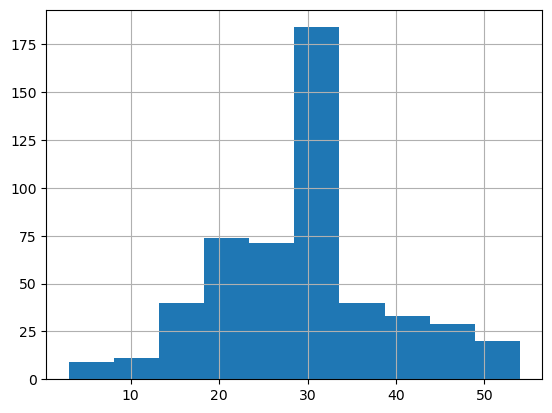

In [ ]:
# гистограмма погибших по возрасту
X.loc[X['Survived'] == 0]['Age'].hist()

*Попробуйте математически преобразовать признак Age.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(2.999, 19.0]'),
  Text(1, 0, '(19.0, 25.0]'),
  Text(2, 0, '(25.0, 29.699]'),
  Text(3, 0, '(29.699, 30.0]'),
  Text(4, 0, '(30.0, 38.0]'),
  Text(5, 0, '(38.0, 54.0]')])

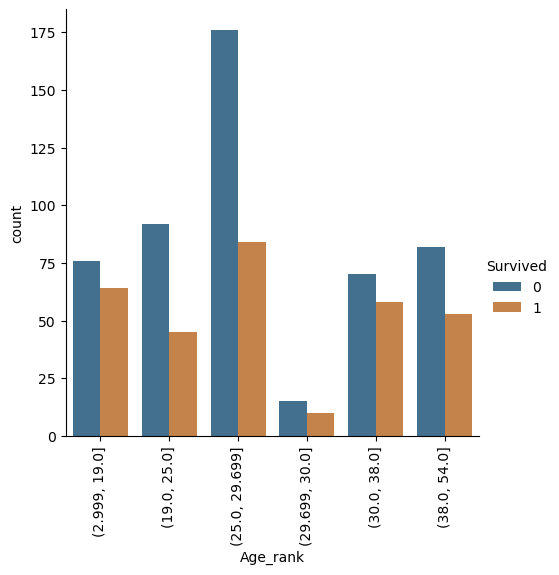

In [ ]:
X['Age_rank'] = pd.qcut(X.Age,6)
sns.catplot(data = X,hue = 'Survived', x = 'Age_rank', kind='count', saturation=0.5)
plt.xticks(rotation=90)

Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику

In [ ]:
Y_ = X['Survived']

X_ = X.drop(columns = ['Survived', 'Age'])

X_ = pd.get_dummies(X_, columns=['Age_rank'])

X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.3, random_state = 42)


In [ ]:
X_train

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_male,"Age_rank_(2.999, 19.0]","Age_rank_(19.0, 25.0]","Age_rank_(25.0, 29.699]","Age_rank_(29.699, 30.0]","Age_rank_(30.0, 38.0]","Age_rank_(38.0, 54.0]"
240,1,0,0,0,1,0,0,0,1,0,0,0
877,0,0,0,0,1,1,1,0,0,0,0,0
357,0,0,0,1,0,0,0,0,0,0,1,0
143,0,0,0,0,1,1,1,0,0,0,0,0
812,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,0,0,0,1,1,0,0,1,0,0,0
115,0,0,0,0,1,1,0,1,0,0,0,0
294,0,0,0,0,1,1,0,1,0,0,0,0
470,0,0,0,0,1,1,0,0,1,0,0,0


In [ ]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_2.score(X_train, y_train)

0.8145580589254766

In [ ]:
model_2.score(X_test, y_test)

0.8306451612903226

In [ ]:
predictions = model_2.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

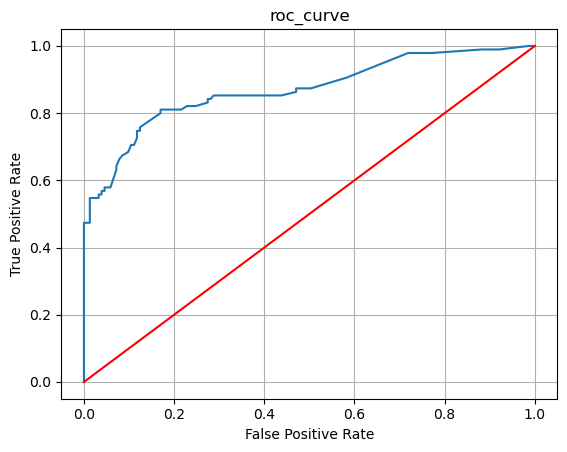

In [ ]:
plt.plot(fpr, tpr)
plt.title('roc_curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1],[0, 1], color='red')
plt.grid()

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.8693842449260406

после работы с данными метрика увеличилась с 73% до почти 87%, модель удачная, причем еще есть варианты улучшения выборки